<a href="https://colab.research.google.com/github/HSSBoston/futurescape/blob/main/code/geomag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cycle ID: [Start date, End date]
cycles = {25: ["2019 12 01", "2025 10 03"],
          24: ["2008 12 01", "2019 11 30"],
          23: ["1996 08 01", "2008 11 30"],
          22: ["1986 09 01", "1996 07 31"],
          21: ["1976 03 01", "1986 08 31"],
          20: ["1964 10 01", "1976 02 29"],
          19: ["1954 04 01", "1964 09 30"],
          18: ["1944 02 01", "1954 03 31"],
          17: ["1933 09 01", "1944 01 31"]}

for cycleId in reversed(range(17, 26)):
    startDate = cycles[cycleId][0]
    endDate = cycles[cycleId][1]
    print("Cycle", cycleId)
    print("  Start:", startDate, "End:", endDate)

    extractedLines = []
    extracting = False

    with open("Kp_ap_Ap_SN_F107_since_1932.txt") as inputFile:
        for index, line in enumerate(inputFile):
            if line.startswith("#YYY"):
                extractedLines.append(line)
            if line.startswith(startDate):
                extracting = True
            if extracting:
                extractedLines.append(line)
            if line.startswith(endDate):
                break

    extractedLineCount = len(extractedLines)
    years = (extractedLineCount-1) // 365
    days = (extractedLineCount-1) % 365
    print("  Extracted", extractedLineCount-1, "lines:", years, "years", days, "days")

    fileName = "cycle" + str(cycleId) + ".txt"
    with open(fileName, "w") as outputFile:
        outputFile.writelines(extractedLines)

Cycle 25
  Start: 2019 12 01 End: 2025 10 03
  Extracted 2134 lines: 5 years 309 days
Cycle 24
  Start: 2008 12 01 End: 2019 11 30
  Extracted 4017 lines: 11 years 2 days
Cycle 23
  Start: 1996 08 01 End: 2008 11 30
  Extracted 4505 lines: 12 years 125 days
Cycle 22
  Start: 1986 09 01 End: 1996 07 31
  Extracted 3622 lines: 9 years 337 days
Cycle 21
  Start: 1976 03 01 End: 1986 08 31
  Extracted 3836 lines: 10 years 186 days
Cycle 20
  Start: 1964 10 01 End: 1976 02 29
  Extracted 4169 lines: 11 years 154 days
Cycle 19
  Start: 1954 04 01 End: 1964 09 30
  Extracted 3836 lines: 10 years 186 days
Cycle 18
  Start: 1944 02 01 End: 1954 03 31
  Extracted 3712 lines: 10 years 62 days
Cycle 17
  Start: 1933 09 01 End: 1944 01 31
  Extracted 3805 lines: 10 years 155 days


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columnNames = ("YYY", "MM", "DD", "days", "days_m", "Bsr", "dB", "Kp1", "Kp2", "Kp3",
               "Kp4", "Kp5", "Kp6", "Kp7", "Kp8", "ap1", "ap2", "ap3", "ap4", "ap5",
               "ap6", "ap7", "ap8", "Ap", "SN", "F10.7obs", "F10.7adj", "D")
cyclesLength = []

for cycleId in reversed(range(17, 26)):
    fileName = "cycle" + str(cycleId) + ".txt"
    df = pd.read_csv(fileName, names=columnNames, skiprows=1)
    days = len(df)
#     print("Cycle", cycleId, days, "days")
    cyclesLength.append([cycleId, days])

columnNames=["CycleId","Length"]
outputDf = pd.DataFrame(cyclesLength, columns=columnNames)
outputDf.to_csv("cycle-length.csv", index=False)

aveLength = outputDf.loc[1:, "Length"].mean()
extraDf = pd.DataFrame([["Ave17-24", aveLength]],
                       columns=columnNames)
newDf = pd.concat([outputDf, extraDf],
                  axis=0, ignore_index=True)

aveLength3Cycles = outputDf.loc[1:3, "Length"].mean()
extraDf = pd.DataFrame([["Ave22-24", aveLength3Cycles]],
                       columns=columnNames)
newDf = pd.concat([newDf, extraDf],
                  axis=0, ignore_index=True)
newDf.to_csv("cycle-length.csv", index=False)
print(newDf)

cycle25length = newDf.loc[0, "Length"]
print( round(cycle25length/aveLength * 100), "% of average cycle length (cycles 17-24)" )
print( round(cycle25length/aveLength3Cycles * 100), "% of average cycle length (cycles 22-24)" )

     CycleId   Length
0         25  2134.00
1         24  4017.00
2         23  4505.00
3         22  3622.00
4         21  3836.00
5         20  4169.00
6         19  3836.00
7         18  3712.00
8         17  3805.00
9   Ave17-24  3937.75
10  Ave22-24  4048.00
54 % of average cycle length (cycles 17-24)
53 % of average cycle length (cycles 22-24)


/tmp/ipython-input-3187961864.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("cycle24.txt",


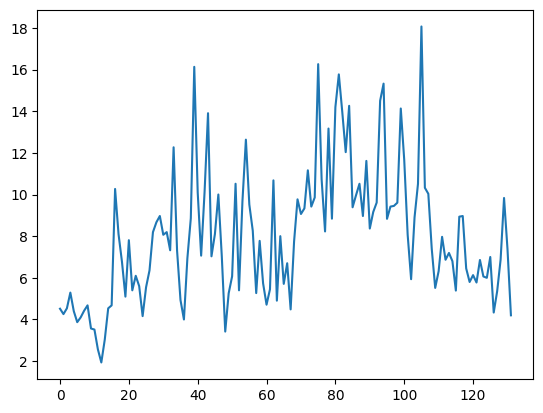

In [ ]:
columnNames = ("YYY", "MM", "DD", "days", "days_m", "Bsr", "dB", "Kp1", "Kp2", "Kp3",
               "Kp4", "Kp5", "Kp6", "Kp7", "Kp8", "ap1", "ap2", "ap3", "ap4", "ap5",
               "ap6", "ap7", "ap8", "Ap", "SN", "F10.7obs", "F10.7adj", "D")
df = pd.read_csv("cycle24.txt",
                 delim_whitespace=True, names=columnNames, skiprows=1)
# print(df)
df = df.loc[: , ["YYY", "MM", "DD", "Ap"]]
yr = df.loc[0, "YYY"]
mo = df.loc[0, "MM"]

monthlyAveApList = []

while True:
    monthlyData = df.query("YYY == @yr and MM == @mo")
    if monthlyData.empty:
        break
    else:
        monthlyAveAp = monthlyData.loc[:, "Ap"].mean()
        monthlyAveApList.append(monthlyAveAp)
        if mo == 12:
            yr += 1
            mo = 1
        else:
            mo += 1
plt.plot(monthlyAveApList)
plt.show()


/tmp/ipython-input-1852512317.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("cycle17.txt",


Imported:  3805 lines 10 yrs 155 days
125 months
            Ap  ApCMA-window7  ApCMA-window13  ApCMA-window25
0    11.666667       9.572312        9.018773        8.180167
1    10.129032       8.832043        8.649760        8.015224
2     9.300000       8.699322        8.427027        7.796431
3     7.193548       9.018773        8.114324        7.827299
4     5.870968       8.218773        7.916248        7.881101
..         ...            ...             ...             ...
120  25.433333      20.207527       17.792278       16.475314
121  23.516129      20.251920       18.271505       16.448771
122  20.233333      21.186380       18.731302       16.067937
123  14.096774      19.191398       19.266263       16.175170
124  12.677419      17.630914       20.251920       16.603037

[125 rows x 4 columns]


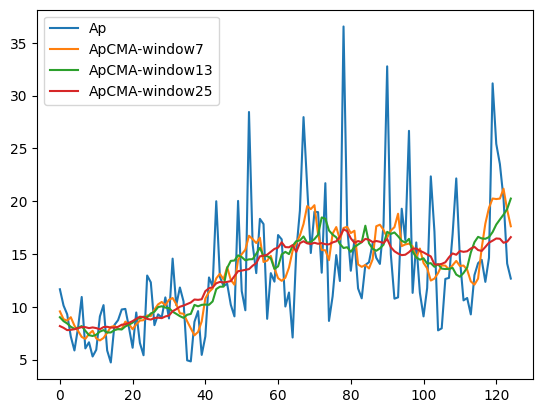

In [ ]:
def centeredMA(monthlyApDf, window, monthCount):
    if window % 2 == 0:
        print("Window size must be an odd.")
        return None
    else:
        monthlyMovingAveApList = []
        halfWindow = int((window-1)/2)
        for i in range(monthCount):
            if i < halfWindow:
                monthlyMovingAveApList.append(monthlyApDf.loc[0:i+halfWindow, "Ap"].mean())
            if i > monthCount - halfWindow:
                monthlyMovingAveApList.append(monthlyApDf.loc[i-halfWindow:monthCount-1, "Ap"].mean())
            if i >= halfWindow and i <= monthCount - halfWindow:
                monthlyMovingAveAp = monthlyApDf.loc[i-halfWindow:i+halfWindow, "Ap"].mean()
                monthlyMovingAveApList.append(monthlyMovingAveAp)
        return monthlyMovingAveApList

fieldNames = ("YYY", "MM", "DD", "days", "days_m", "Bsr", "dB", "Kp1", "Kp2", "Kp3",
              "Kp4", "Kp5", "Kp6", "Kp7", "Kp8", "ap1", "ap2", "ap3", "ap4", "ap5",
              "ap6", "ap7", "ap8", "Ap", "SN", "F10.7obs", "F10.7adj", "D")

df = pd.read_csv("cycle17.txt",
                 delim_whitespace=True, names=fieldNames, skiprows=1)
df = df.loc[: , ["YYY", "MM", "DD", "Ap"]]
days = len(df)
print("Imported: ", days, "lines", days//365, "yrs", days%365, "days")

yr = df.loc[0, "YYY"]
mo = df.loc[0, "MM"]
monthlyAveApList = []

while True:
    monthlyData = df.query("YYY == @yr and MM == @mo")
    if monthlyData.empty:
        break
    else:
        monthlyAveAp = monthlyData.loc[:, "Ap"].mean()
        monthlyAveApList.append(monthlyAveAp)
        if mo == 12:
            yr += 1
            mo = 1
        else:
            mo += 1

columnNames = ["Ap"]
monthlyApDf = pd.DataFrame(monthlyAveApList,
                           columns=columnNames)
monthCount = len(monthlyApDf)
print(monthCount, "months")

for window in [7, 13, 25]:
    monthlyMovingAveApList = centeredMA(monthlyApDf, window, monthCount)
    columnNames = ["ApCMA-window" + str(window)]
    cmaDf = pd.DataFrame(monthlyMovingAveApList,
                         columns=columnNames)
    monthlyApDf = pd.concat([monthlyApDf, cmaDf], axis=1)

print(monthlyApDf)

monthlyApDf.plot()
plt.show()



/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


Cycle 25 Imported:  2134 lines 5 yrs 309 days
71 months
Cycle 24 Imported:  4017 lines 11 yrs 2 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


132 months
Cycle 23 Imported:  4505 lines 12 yrs 125 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


148 months
Cycle 22 Imported:  3622 lines 9 yrs 337 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


119 months
Cycle 21 Imported:  3836 lines 10 yrs 186 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


126 months
Cycle 20 Imported:  4169 lines 11 yrs 154 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


137 months
Cycle 19 Imported:  3836 lines 10 yrs 186 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


126 months
Cycle 18 Imported:  3712 lines 10 yrs 62 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


122 months
Cycle 17 Imported:  3805 lines 10 yrs 155 days


/tmp/ipython-input-1964478545.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


125 months
           25        24         23         22         21        20         19  \
0    4.582234  4.424457  10.207933  11.024720  13.470968  7.690860  10.853917   
1    4.553810  4.423819   9.923877  10.517464  13.230645  7.451277  10.576344   
2    4.675071  4.451997   9.958261  10.205487  12.745759  7.704839  10.110872   
3    5.064231  4.363464   9.781790   9.891605  12.503441  7.702097  10.312688   
4    5.152233  4.286433   9.519809   9.971841  12.281720  7.779032  10.433613   
..        ...       ...        ...        ...        ...       ...        ...   
143       NaN       NaN   7.157080        NaN        NaN       NaN        NaN   
144       NaN       NaN   7.088917        NaN        NaN       NaN        NaN   
145       NaN       NaN   6.658184        NaN        NaN       NaN        NaN   
146       NaN       NaN   6.099328        NaN        NaN       NaN        NaN   
147       NaN       NaN   5.656375        NaN        NaN       NaN        NaN   

            18  

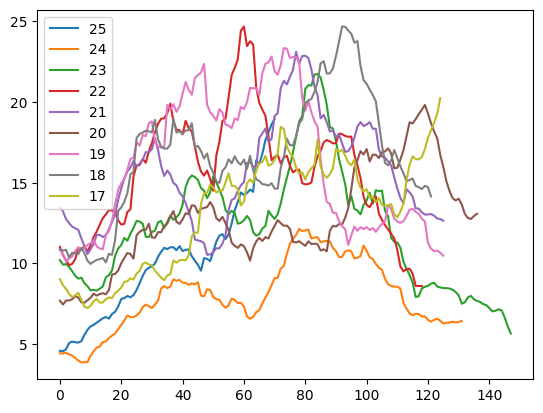

In [ ]:
window = 13

def centeredMA(monthlyApDf, window):
    if window % 2 == 0:
        print("Window size must be an odd.")
        return None
    else:
        monthlyMovingAveApList = []
        halfWindow = int((window-1)/2)
        for i in range(monthCount):
            if i < halfWindow:
                monthlyMovingAveApList.append(monthlyApDf.loc[0:i+halfWindow, "Ap"].mean())
            if i > monthCount - halfWindow:
                monthlyMovingAveApList.append(monthlyApDf.loc[i-halfWindow:monthCount-1, "Ap"].mean())
            if i >= halfWindow and i <= monthCount - halfWindow:
                monthlyMovingAveAp = monthlyApDf.loc[i-halfWindow:i+halfWindow, "Ap"].mean()
                monthlyMovingAveApList.append(monthlyMovingAveAp)
        return monthlyMovingAveApList

fieldNames = ("YYY", "MM", "DD", "days", "days_m", "Bsr", "dB", "Kp1", "Kp2", "Kp3",
              "Kp4", "Kp5", "Kp6", "Kp7", "Kp8", "ap1", "ap2", "ap3", "ap4", "ap5",
              "ap6", "ap7", "ap8", "Ap", "SN", "F10.7obs", "F10.7adj", "D")

monthlyMovingApDf = pd.DataFrame(index=[], columns=[])

for cycleId in reversed(range(17, 26)):
    fileName = "cycle" + str(cycleId) + ".txt"
    df = pd.read_csv(fileName,
                     delim_whitespace=True, names=fieldNames, skiprows=1)
    df = df.loc[: , ["YYY", "MM", "DD", "Ap"]]
    days = len(df)
    print("Cycle", cycleId, "Imported: ", days, "lines", days//365, "yrs", days%365, "days")
    #print(df)

    yr = df.loc[0, "YYY"]
    mo = df.loc[0, "MM"]
    monthlyAveApList = []

    while True:
        monthlyData = df.query("YYY == @yr and MM == @mo")
        if monthlyData.empty:
            break
        else:
            monthlyAveAp = monthlyData.loc[:, "Ap"].mean()
            monthlyAveApList.append(monthlyAveAp)
            if mo == 12:
                yr += 1
                mo = 1
            else:
                mo += 1

    columnNames = ["Ap"]
    monthlyApDf = pd.DataFrame(monthlyAveApList,
                               columns=columnNames)
    monthCount = len(monthlyApDf)
    print(monthCount, "months")

    monthlyMovingAveApList = centeredMA(monthlyApDf, window)
#     columnNames = ["ApCMA-" + str(cycleId) + "-window"+ str(window)]
    columnNames = [str(cycleId)]
    cmaDf = pd.DataFrame(monthlyMovingAveApList,
                         columns=columnNames)
    monthlyMovingApDf = pd.concat([monthlyMovingApDf, cmaDf], axis=1)

print(monthlyMovingApDf)

monthlyMovingApDf.plot()
plt.show()



/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,
/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


Cycle 25 Imported:  2134 lines 5 yrs 309 days
71 months
Cycle 24 Imported:  4017 lines 11 yrs 2 days
132 months
Cycle 23 Imported:  4505 lines 12 yrs 125 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


148 months
Cycle 22 Imported:  3622 lines 9 yrs 337 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


119 months
Cycle 21 Imported:  3836 lines 10 yrs 186 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


126 months
Cycle 20 Imported:  4169 lines 11 yrs 154 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


137 months
Cycle 19 Imported:  3836 lines 10 yrs 186 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


126 months
Cycle 18 Imported:  3712 lines 10 yrs 62 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


122 months
Cycle 17 Imported:  3805 lines 10 yrs 155 days


/tmp/ipython-input-2369071311.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(fileName,


125 months
           25        24         23         22         21        20         19  \
0    4.582234  4.424457  10.207933  11.024720  13.470968  7.690860  10.853917   
1    4.553810  4.423819   9.923877  10.517464  13.230645  7.451277  10.576344   
2    4.675071  4.451997   9.958261  10.205487  12.745759  7.704839  10.110872   
3    5.064231  4.363464   9.781790   9.891605  12.503441  7.702097  10.312688   
4    5.152233  4.286433   9.519809   9.971841  12.281720  7.779032  10.433613   
..        ...       ...        ...        ...        ...       ...        ...   
143       NaN       NaN   7.157080        NaN        NaN       NaN        NaN   
144       NaN       NaN   7.088917        NaN        NaN       NaN        NaN   
145       NaN       NaN   6.658184        NaN        NaN       NaN        NaN   
146       NaN       NaN   6.099328        NaN        NaN       NaN        NaN   
147       NaN       NaN   5.656375        NaN        NaN       NaN        NaN   

            18  

<Axes: >

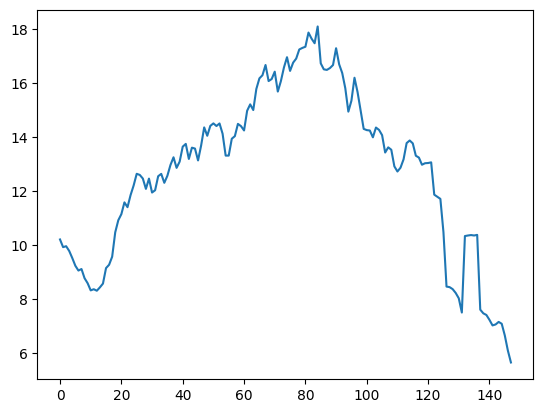

In [ ]:
window = 13

def centeredMA(monthlyApDf, window):
    if window % 2 == 0:
        print("Window size must be an odd.")
        return None
    else:
        monthlyMovingAveApList = []
        halfWindow = int((window-1)/2)
        for i in range(monthCount):
            if i < halfWindow:
                monthlyMovingAveApList.append(monthlyApDf.loc[0:i+halfWindow, "Ap"].mean())
            if i > monthCount - halfWindow:
                monthlyMovingAveApList.append(monthlyApDf.loc[i-halfWindow:monthCount-1, "Ap"].mean())
            if i >= halfWindow and i <= monthCount - halfWindow:
                monthlyMovingAveAp = monthlyApDf.loc[i-halfWindow:i+halfWindow, "Ap"].mean()
                monthlyMovingAveApList.append(monthlyMovingAveAp)
        return monthlyMovingAveApList

def qFunc(x, a, b, c):
    return a * (x-b)**2 + c

fieldNames = ("YYY", "MM", "DD", "days", "days_m", "Bsr", "dB", "Kp1", "Kp2", "Kp3",
              "Kp4", "Kp5", "Kp6", "Kp7", "Kp8", "ap1", "ap2", "ap3", "ap4", "ap5",
              "ap6", "ap7", "ap8", "Ap", "SN", "F10.7obs", "F10.7adj", "D")

monthlyMovingApDf = pd.DataFrame(index=[], columns=[])

for cycleId in reversed(range(17, 26)):
    fileName = "cycle" + str(cycleId) + ".txt"
    df = pd.read_csv(fileName,
                     delim_whitespace=True, names=fieldNames, skiprows=1)
    df = df.loc[: , ["YYY", "MM", "DD", "Ap"]]
    days = len(df)
    print("Cycle", cycleId, "Imported: ", days, "lines", days//365, "yrs", days%365, "days")
    #print(df)

    yr = df.loc[0, "YYY"]
    mo = df.loc[0, "MM"]
    monthlyAveApList = []

    while True:
        monthlyData = df.query("YYY == @yr and MM == @mo")
        if monthlyData.empty:
            break
        else:
            monthlyAveAp = monthlyData.loc[:, "Ap"].mean()
            monthlyAveApList.append(monthlyAveAp)
            if mo == 12:
                yr += 1
                mo = 1
            else:
                mo += 1

    columnNames = ["Ap"]
    monthlyApDf = pd.DataFrame(monthlyAveApList,
                               columns=columnNames)
    monthCount = len(monthlyApDf)
    print(monthCount, "months")

    monthlyMovingAveApList = centeredMA(monthlyApDf, window)
#     columnNames = ["ApCMA-" + str(cycleId) + "-window"+ str(window)]
    columnNames = [str(cycleId)]
    cmaDf = pd.DataFrame(monthlyMovingAveApList,
                         columns=columnNames)
    monthlyMovingApDf = pd.concat([monthlyMovingApDf, cmaDf], axis=1)

# print(monthlyMovingApDf)
monthlyMedian = monthlyMovingApDf.median(axis=1)
monthlyMedianDf = pd.DataFrame(monthlyMedian, columns=["Median"])
monthlyMovingApDf = pd.concat([monthlyMovingApDf, monthlyMedianDf], axis=1)
print(monthlyMovingApDf)
monthlyMovingApDf.to_csv("monthly-ma.csv", index=False)

monthlyMovingApDf.loc[:,"Median"].plot()

In [ ]:
def predictAp(currentMonth, currentYear, futureMonth, futureYear):

  cycle25 = pd.read_csv("cycle25.txt", delim_whitespace=True, names=fieldNames, skiprows=1)
  yr = cycle25.loc[0, "YYY"]
  mo = cycle25.loc[0, "MM"]

  monthlyMaColumns = ["25", "24", "23", "22", "21", "20", "19", "18", "17", "Median"]
  monthlyMovingAveApDf = pd.read_csv("monthly-ma.csv", names=monthlyMaColumns, skiprows=1)

  currentMonthPos = (currentMonth - mo) + (currentYear - yr)*12
  futureMonthPos = currentMonthPos + ((futureYear - currentYear)*12 +  (futureMonth - currentMonth))
  print(futureMonthPos)
  ap = monthlyMovingAveApDf.loc[futureMonthPos, "Median"]
  print(ap)

  print("In", futureYear, futureMonth, "the Ap will be", ap)

predictAp(10, 2025, 8, 2026)
predictAp(10, 2025, 12, 2026)

80
17.33898898654182
In 2026 8 the Ap will be 17.33898898654182
84
18.088310882665724
In 2026 12 the Ap will be 18.088310882665724


/tmp/ipython-input-752390975.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cycle25 = pd.read_csv("cycle25.txt", delim_whitespace=True, names=fieldNames, skiprows=1)
/tmp/ipython-input-752390975.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cycle25 = pd.read_csv("cycle25.txt", delim_whitespace=True, names=fieldNames, skiprows=1)
